In [1]:
import pandas as pd

In [33]:
df = pd.read_csv('C:/Users/Sotiris/Desktop/wireshark_02_05/wireshark.csv')
df.head()

,Address A,Address B,Packets,Bytes,Packets A - B,Bytes A - B,Packets B - A,Bytes B - A,Rel Start,Duration,Bits/s A - B,Bits/s B - A
0,0.0.0.0,255.255.255.255,7307,1667431,7307,1667431,0,0,0.265795,5464.936439,2440.915489,0.0
1,0.0.0.0,239.255.255.250,182,10920,182,10920,0,0,7.432497,5434.628878,16.074695,0.0
2,0.0.0.0,224.0.0.251,121,7538,121,7538,0,0,26.273820,5393.257379,11.181369,0.0
3,1.1.1.1,147.102.236.161,1,350,0,0,1,350,1939.841781,0.000000,0.000000,0.0
4,1.71.188.254,147.102.203.180,1,60,1,60,0,0,4861.505219,0.000000,0.000000,0.0


In [34]:
df['Rel Start'] = df['Rel Start'].astype(int)
df.index = df['Rel Start']
df.drop(columns=['Rel Start'],inplace=True)

df['source computer'] = df['Address A']
df['byte count'] = df['Bytes']

df = df[df['source computer'].str.startswith( '147.102')]

df.head()

,Address A,Address B,Packets,Bytes,Packets A - B,Bytes A - B,Packets B - A,Bytes B - A,Duration,Bits/s A - B,Bits/s B - A,source computer,byte count
Rel Start,,,,,,,,,,,,,
4668,147.102.32.31,147.102.203.180,259,171121,154,147827,105,23294,13.757603,85960.904672,13545.382869,147.102.32.31,171121
3066,147.102.200.3,224.0.0.251,55,5572,55,5572,0,0,2055.395614,21.687309,0.000000,147.102.200.3,5572
5174,147.102.200.8,224.0.0.251,17,1751,17,1751,0,0,281.916288,49.688509,0.000000,147.102.200.8,1751
1094,147.102.200.11,224.0.0.251,47,7475,47,7475,0,0,2924.266825,20.449570,0.000000,147.102.200.11,7475
4747,147.102.200.14,239.255.255.250,65,10427,65,10427,0,0,180.429754,462.318427,0.000000,147.102.200.14,10427


In [35]:
from helper import group_scale_data, group_scale_data_batch

groupped_data, hosts, parameters = group_scale_data(df, size_of_bin_seconds=1000,
                                                    doScale=True, scaler='log')

In [37]:
import numpy as np

print(len(hosts))
print(np.sum(groupped_data['number of flows'] == 1))

621
3025


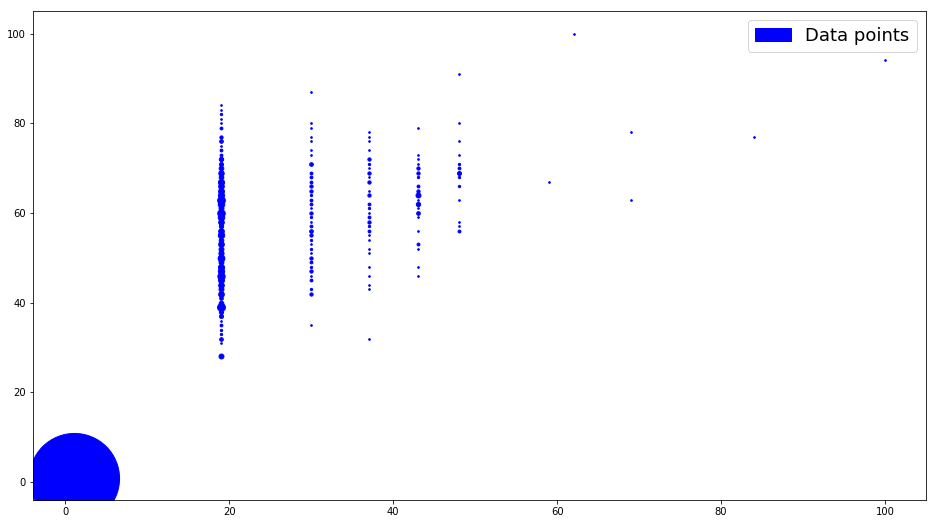

In [38]:
from plots import plot_points

plot_points(groupped_data.values[:,:2])